# Huaibin Ge

# Assignment 3

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('./hw3_data.csv')

In [3]:
feature = data.iloc[:,:2]
actual_ys = data.iloc[:, 2]

In [4]:
feature = np.array(feature)
actual_ys = np.array(actual_ys)

In [5]:
feature.shape

(10000, 2)

In [6]:
feature.shape[1]

2

## a) Scratch sigmoid function

In [7]:
# def sigmoid(weights, features):
    
#     value = []
    
#     for observation in features:
#         linear_function = weights[0]
#         for i in range(len(observation)):
#             linear_function += weights[i+1]*observation[i]
#         sigmoid_value = 1/(1+np.exp(linear_function))
#         value.append(sigmoid_value)
        
#     return value

In [8]:
# for one observation return one sigmoid probability value
def sigmoid(weights, features):
    linear_function = weights[0]
    for i in range(len(features)):
        linear_function += weights[i+1]*features[i]
    sigmoid_value = 1/(1+np.exp(-linear_function))
    return sigmoid_value

## b) Scratch log-likelkihood function

In [9]:
def log_likelihood(weights, features, actual_ys):
    
    log_function = 0
    for j in range(len(features)):
        observation = features[j]
        
        linear_function = weights[0]
        for i in range(len(observation)):
            linear_function += weights[i+1]*observation[i]
            
        log_function += -np.log(1+np.exp(linear_function)) + actual_ys[j]*linear_function
        #value.append(log_function)
        
    return log_function
        

## c) Scratch gradient descent

In [10]:
def learn_weights(actual_ys, features, num_iterations, learning_rate):
    initial_weights = [0]*(features.shape[1]+1)
    new_weight = [0]*(features.shape[1]+1)
    log = []
    
    num_feartures = features.shape[1]
    num_points = features.shape[0]
        
    for i in range(num_iterations):

        for num_f in range(num_feartures):
            b0  = 0
            bj = 0
            
            # gradient for each feature
            for j in range(num_points):
                observation = features[j]
                if num_f == 0:
                    b0 += actual_ys[j]-sigmoid(initial_weights, observation)
                bj += (actual_ys[j]-sigmoid(initial_weights, observation))*features[j][num_f]
            
            # weight for each feature
            if num_f == 0:
                new_weight[0] += b0*learning_rate
            new_weight[num_f+1] += bj*learning_rate
            
        initial_weights = new_weight
        
        
        if i % 1000 == 0:
            log.append(log_likelihood(initial_weights, features, actual_ys))
            print(log_likelihood(initial_weights, features, actual_ys))
    
    return new_weight, log

In [11]:
feature[2,1]

-1.2471066000000002

In [12]:
feature.shape

(10000, 2)

In [13]:
feature.shape

(10000, 2)

In [15]:
weight, log = learn_weights(actual_ys, feature, 10000, 0.00005)

-4346.264779679935
-239.6887556895856
-194.06744858451182
-176.45303739518187
-166.95004138185567
-160.9910457704658
-156.91573624500117
-153.96608682560392
-151.74400212488916
-150.01942210807445


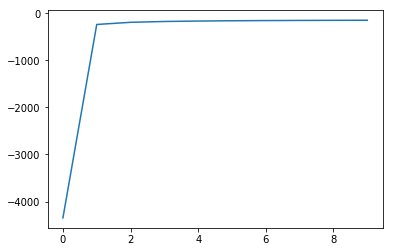

In [16]:
plt.plot(log)

In [17]:
print('The highest log-likelihood is', round(max(log),3))

The highest log-likelihood is -150.019


# Bonus: Scratch Logistic Regression

In [19]:
weight

[-10.884660755966964, -3.921478422833348, 6.441858713399884]

In [20]:
def logistic_regression(weights, features, T):
    predict = []
    for observation in features:
        linear = weights[0]
        for i in range(len(observation)):
            linear += weights[i+1]*observation[i]
        sigmoid = 1/(1+np.exp(-linear))
        if sigmoid > T:
            predict.append(1)
        else:
            predict.append(0)
    return predict
    

In [21]:
predict_logistic = logistic_regression(weight, feature, 0.5)

In [22]:
len(predict_logistic)

10000

In [23]:
from sklearn.metrics import f1_score

In [24]:
f1_score(actual_ys,predict_logistic)

0.9949015295411376